# Data Visualization

And there were plots upon plots upon plots. All plots combined, together and bonded, to form a single, cohesive, and coherent story. The story of those who were once plots and became Them, The Plots. What happens when plots plot to make plots about Them Plots?

## Load modules and watermark

In [2]:
from bokeh.models import (Slider, TabPanel, Tabs, Legend, ColumnDataSource, LegendItem,
                          CDSView, GroupFilter, CategoricalColorMapper, Label, Span,
                          DataTable, HoverTool, TableColumn)
from bokeh.io import curdoc, show, output_notebook, save
from bokeh.plotting import figure
from bokeh.embed import json_item
from bokeh.layouts import column, gridplot
from bokeh.themes import Theme
import pandas as pd
import json

import numpy as np
import pacmap
import pickle
import matplotlib.pyplot as plt

## Load data

In [39]:
import pandas as pd

# It is right in front of you. You just need to open your eyes:
df = pd.read_excel('../data/al_atlas_main_results.xlsx', index_col=0).sort_index()

import numpy as np

df2 = df.sort_values(by='P(Dead)').reset_index().reset_index(names=['Percentile'])

df2['Percentile'] = df2['Percentile'] / len(df2)


## Plots upon plots

### Bokeh

In [4]:
output_notebook()

Loading BokehJS ...

In [58]:
from bokeh.layouts import column
from bokeh.models import (ColumnDataSource, DataTable, HoverTool, IntEditor,
                          NumberEditor, NumberFormatter, SelectEditor,
                          StringEditor, StringFormatter, TableColumn)
from bokeh.plotting import figure, show

source = ColumnDataSource(df2)
tooltips = [("EpiDx", "@{AL Epigenomic Phenotype}")]
width = 1000
tools = "pan,wheel_zoom,box_select,reset"
active_drag = "box_select"
font_size = "8pt"
cols = ['AL Epigenomic Phenotype', 'WHO 2022 Diagnosis', 'Vital Status', 'AML Epigenomic Risk', 'Risk Group AAML1831']


columns = [TableColumn(field=col, title=col) for col in cols]
data_table = DataTable(source=source, columns=columns, editable=True, width=width,
                       index_position=None, height=300, 
                       reorderable=True, sortable=True,
                    #    selectable=True, fit_columns=True,
                    #    autosize_mode='force_fit', 
                    #    sizing_mode='stretch_both',
                    #    scroll_to_selection=True,
                    )


p1 = figure(width=width, height=300, tools="pan,wheel_zoom,xbox_select,reset", active_drag='xbox_select')

scatter1 = p1.circle(x='Percentile', y='P(Dead)', source=source, selection_color='#ff7f0e', 
              nonselection_alpha=1.0, color='#1f77b4', size=5, alpha=0.8, hover_color='#ff7f0e',
              hover_alpha=1.0)

scatter1_hover_tool = HoverTool(renderers=[scatter1], tooltips=tooltips)

tabs = []

for col in cols:
    factors = [str(val) for val in df2[col].unique() if pd.notnull(val)]
    color_mapper = CategoricalColorMapper(factors=factors, palette=custom_color_palette)

    p2 = figure(title=None, width=width, height=600,tools=tools, tooltips=tooltips, 
            x_axis_label='Longitude (PaCMAP 1)', y_axis_label='Latitude (PaCMAP 2)',
            active_drag=active_drag)

    p2.toolbar.logo = None
    p2.toolbar_location = 'above'
    p2.xaxis.axis_label_text_font_size = font_size
    p2.yaxis.axis_label_text_font_size = font_size
    p2.xaxis.axis_label_text_font_style = "normal"
    p2.yaxis.axis_label_text_font_style = "normal"

    # Create scatter plot for each factor
    for factor in factors:
        view = CDSView(filter=GroupFilter(column_name=col, group=factor))
        p2.scatter(x="PaCMAP 1 of 2", y="PaCMAP 2 of 2", source=source, view=view, 
                color={'field': col, 'transform': color_mapper}, size=3)

    # Create a list of legend items
    legend_items = [LegendItem(label=factor, renderers=[r]) for factor, r in zip(factors, p2.renderers)]

    # Create a legend
    legend = Legend(items=legend_items, location="top", click_policy="hide",
                    label_text_font_size=font_size, label_text_font_style="normal",
                    glyph_height=15, glyph_width=15, spacing=1, margin=5, padding=0,
                    )

    # Add the legend to the plot
    p2.add_layout(legend, 'right')

    tab = TabPanel(child=p2, title=col)
    tabs.append(tab)

tabs_control = Tabs(tabs=tabs, tabs_location='above')

p1.add_tools(scatter1_hover_tool)

show(column(tabs_control, p1, data_table))

In [33]:
from bokeh.layouts import column
from bokeh.models import (ColumnDataSource, DataTable, HoverTool, IntEditor,
                          NumberEditor, NumberFormatter, SelectEditor,
                          StringEditor, StringFormatter, TableColumn)
from bokeh.plotting import figure, show
from bokeh.sampledata.autompg2 import autompg2 as mpg

source = ColumnDataSource(mpg)

manufacturers = sorted(mpg["manufacturer"].unique())
models = sorted(mpg["model"].unique())
transmissions = sorted(mpg["trans"].unique())
drives = sorted(mpg["drv"].unique())
classes = sorted(mpg["class"].unique())

columns = [
    TableColumn(field="manufacturer", title="Manufacturer",
                editor=SelectEditor(options=manufacturers),
                formatter=StringFormatter(font_style="bold")),
    TableColumn(field="model", title="Model",
                editor=StringEditor(completions=models)),
    TableColumn(field="displ", title="Displacement",
                editor=NumberEditor(step=0.1), formatter=NumberFormatter(format="0.0")),
    TableColumn(field="year", title="Year", editor=IntEditor()),
    TableColumn(field="cyl", title="Cylinders", editor=IntEditor()),
    TableColumn(field="trans", title="Transmission",
                editor=SelectEditor(options=transmissions)),
    TableColumn(field="drv", title="Drive", editor=SelectEditor(options=drives)),
    TableColumn(field="class", title="Class", editor=SelectEditor(options=classes)),
    TableColumn(field="cty", title="City MPG", editor=IntEditor()),
    TableColumn(field="hwy", title="Highway MPG", editor=IntEditor()),
]
data_table = DataTable(source=source, columns=columns, editable=True, width=800,
                       index_position=-1, index_header="row index", index_width=60)

p = figure(width=800, height=300, tools="pan,wheel_zoom,xbox_select,reset", active_drag="xbox_select")

cty = p.circle(x="index", y="cty", fill_color="#396285", size=8, alpha=0.5, source=source)
hwy = p.circle(x="index", y="hwy", fill_color="#CE603D", size=8, alpha=0.5, source=source)

tooltips = [
    ("Manufacturer", "@manufacturer"),
    ("Model", "@model"),
    ("Displacement", "@displ"),
    ("Year", "@year"),
    ("Cylinders", "@cyl"),
    ("Transmission", "@trans"),
    ("Drive", "@drv"),
    ("Class", "@class"),]

cty_hover_tool = HoverTool(renderers=[cty], tooltips=[*tooltips, ("City MPG", "@cty")])
hwy_hover_tool = HoverTool(renderers=[hwy], tooltips=[*tooltips, ("Highway MPG", "@hwy")])

p.add_tools(cty_hover_tool, hwy_hover_tool)

show(column(p, data_table))

In [6]:
# Custom color palette
custom_color_palette = [
    '#1f77b4',  # Vivid blue
    '#ff7f0e',  # Vivid orange 
    '#2ca02c',  # Vivid green
    '#d62728',  # Vivid red
    '#9467bd',  # Vivid purple 
    '#7f7f7f',  # Medium gray
    '#e377c2',  # Pink
    '#e7ba52',  # Light orange
    '#bcbd22',  # Olive
    '#17becf',  # Light blue
    '#393b79',  # Dark blue
    '#8c564b',  # Brown
    '#f7b6d2',  # Light pink
    '#c49c94',  # Light brown
    '#a2769e',  # Soft purple
    '#dbdb8d',  # Pale yellow
    '#9edae5',  # Pale cyan
    '#c5b0d5',  # Pale purple
    '#c7c7c7',  # Light gray
    '#ff9896',  # Light red
    '#637939',  # Dark olive
    '#aec7e8',  # Light blue
    '#ffbb78',  # Light orange
    '#98df8a',  # Light green
    '#7c231e',  # Dark red
    '#3d6a3d',  # Dark green
    '#f96502',  # Deep orange
    '#6d3f7d',  # Deep purple
    '#6b4423',  # Dark brown
    '#d956a6'   # Hot pink
]

In [26]:

def create_risk_plot(df2, export=False):
    # Create a ColumnDataSource from df: source
    source = ColumnDataSource(df2)

    p1 = figure(
                tools="pan,wheel_zoom,box_zoom,xbox_select,reset", 
                active_drag="xbox_select", width=1000, height=600,)
    p1.toolbar.logo = None

    # Add circle glyphs to the figure p with the selected and non-selected properties
    p1.circle(x='Percentile', y='P(Dead)', source=source, selection_color='#ff7f0e', 
              nonselection_alpha=1.0, color='#1f77b4', size=5, alpha=0.8, hover_color='#ff7f0e',
              hover_alpha=1.0)

    # Existing columns
    columns = [
        TableColumn(field="WHO 2022 Diagnosis", title="WHO 2022 Diagnosis"),
        TableColumn(field="Vital Status", title="Vital Status"),
        TableColumn(field="Clinical Trial", title="Clinical Trial"),
        TableColumn(field="FLT3 ITD", title="FLT3 ITD"),
        TableColumn(field="Gene Fusion", title="Gene Fusion")
    ]

    data_table = DataTable(source=source, columns=columns, editable=True, width=1000)


    # Define the tooltips for the HoverTool
    tooltips = [
        ("AML Epigenomic Risk", "@{AML Epigenomic Risk}"),
        ("AL Epigenomic Phenotype", "@{AL Epigenomic Phenotype}"),
    ]
    hover = HoverTool(tooltips=tooltips)
    p1.add_tools(hover)

    #### ------------------ PaCMAP Plot ------------------ ####

    # Initial setup
    title = ''
    # x_range = (-45, 45)
    # y_range = (-45, 45)
    datapoint_size = 1
    tooltip_dx_cols = 'AL Epigenomic Phenotype'
    width = 1000
    height = 1400

    tabs = []

    cols = ['WHO 2022 Diagnosis', 'Vital Status', 'AL Epigenomic Phenotype']

    for col in cols:
        factors = [str(val) for val in df2[col].unique() if pd.notnull(val)]
        color_mapper = CategoricalColorMapper(factors=factors, palette=custom_color_palette)

        p = figure(title=title, width=width, height=height,
                    # x_range=x_range, y_range=y_range, 
                tools="pan,wheel_zoom,reset,save,box_select", tooltips=[("Dx", "@{"+tooltip_dx_cols+"}")], 
                x_axis_label='Longitude (PaCMAP 1)', y_axis_label='Latitude (PaCMAP 2)', active_drag="box_select")
        p.toolbar.logo = None
        p.toolbar_location = 'above'
        p.xaxis.axis_label_text_font_size = "10pt"
        p.yaxis.axis_label_text_font_size = "10pt"
        p.xaxis.axis_label_text_font_style = "normal"
        p.yaxis.axis_label_text_font_style = "normal"

        # Create scatter plot for each factor
        for factor in factors:
            view = CDSView(filter=GroupFilter(column_name=col, group=factor))
            p.scatter(x="PaCMAP 1 of 2", y="PaCMAP 2 of 2", source=source, view=view, 
                    color={'field': col, 'transform': color_mapper})

        # Create a list of legend items
        legend_items = [LegendItem(label=factor, renderers=[r]) for factor, r in zip(factors, p.renderers)]

        # Create a legend
        legend = Legend(items=legend_items, location="center")

        # Add the legend to the plot
        p.add_layout(legend, 'below')

        tab = TabPanel(child=p, title=col)
        tabs.append(tab)

    tabs_control = Tabs(tabs=tabs, tabs_location='above')

    layout = gridplot([[tabs_control],[p1,data_table]], )

    return layout

save(create_risk_plot(df2, export=False), filename='bokeh_plot.html', title='AML Epigenomic Risk Plot')

/tmp/ipykernel_47931/1678011886.py:85: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  layout = gridplot([[tabs_control],[p1,data_table]], )
/tmp/ipykernel_47931/1678011886.py:89: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(create_risk_plot(df2, export=False), filename='bokeh_plot.html', title='AML Epigenomic Risk Plot')


'/home/fmarchi/projects/MethylScore/Code/main/bokeh_plot.html'

In [6]:

def create_risk_plot(df2, export=False):
    # Create a ColumnDataSource from df: source
    source = ColumnDataSource(df2)

    p1 = figure(
                tools="pan,wheel_zoom,box_zoom,xbox_select,reset", 
                active_drag="xbox_select", width=1000, height=600,)
    p1.toolbar.logo = None

    BINARY_THRESHOLD = 0.5

    # Set the x_range and y_range of the plot to (-3, 3) and (-0.05, 1.1) respectively
    # p1.x_range.bounds = (0.1, 0.9)
    # p1.x_range.start = -0 
    # p1.x_range.end = 1
    # p1.y_range.bounds = (-0.05, 1.1)
    # p1.y_range.start = -0.05
    # p1.y_range.end = 1.1

    # Add circle glyphs to the figure p with the selected and non-selected properties
    p1.circle(x='Percentile', y='P(Dead)', source=source, selection_color='#ff7f0e', 
              nonselection_alpha=1.0, color='#1f77b4', size=5, alpha=0.8, hover_color='#ff7f0e',
              hover_alpha=1.0)
    

    # Axis labels and range
    p1.xaxis.axis_label = "AML Epigenomic Risk Probability"
    p1.yaxis.axis_label = "est. probability of event"
    p1.xaxis.axis_label_text_font_size = "10pt"
    p1.yaxis.axis_label_text_font_size = "10pt"
    p1.xaxis.axis_label_text_font_style = "normal"
    p1.yaxis.axis_label_text_font_style = "normal"

    # Add vertical line at the binary threshold
    p1.add_layout(Span(location=BINARY_THRESHOLD, dimension='height', line_color='black'))

    # Text annotations for risk categories
    labels = [
        Label(x=-BINARY_THRESHOLD, y=20, text="Low Risk", text_color='black', text_align='center', y_units='screen'),
        Label(x=BINARY_THRESHOLD + 0.45, y=20, text="High Risk", text_color='black', text_align='center', y_units='screen'),
    ]

    for label in labels:
        p1.add_layout(label)

    # Existing columns
    columns = [
        TableColumn(field="WHO 2022 Diagnosis", title="WHO 2022 Diagnosis"),
        TableColumn(field="Vital Status", title="Vital Status"),
        TableColumn(field="Clinical Trial", title="Clinical Trial"),
        TableColumn(field="FLT3 ITD", title="FLT3 ITD"),
        TableColumn(field="Gene Fusion", title="Gene Fusion")
    ]

    data_table = DataTable(source=source, columns=columns, editable=True, width=600)


    # Define the tooltips for the HoverTool
    tooltips = [
        ("P(Dead)", "@{P(Dead)}"),
        ("Percentile", "@{Percentile}"),
        ("AML Epigenomic Risk", "@{AML Epigenomic Risk}"),
    ]
    hover = HoverTool(tooltips=tooltips)
    p1.add_tools(hover)

    #### ------------------ PaCMAP Plot ------------------ ####

    # Custom color palette
    custom_color_palette = [
        '#1f77b4',  # Vivid blue
        '#ff7f0e',  # Vivid orange 
        '#2ca02c',  # Vivid green
        '#d62728',  # Vivid red
        '#9467bd',  # Vivid purple 
        '#7f7f7f',  # Medium gray
        '#e377c2',  # Pink
        '#e7ba52',  # Light orange
        '#bcbd22',  # Olive
        '#17becf',  # Light blue
        '#393b79',  # Dark blue
        '#8c564b',  # Brown
        '#f7b6d2',  # Light pink
        '#c49c94',  # Light brown
        '#a2769e',  # Soft purple
        '#dbdb8d',  # Pale yellow
        '#9edae5',  # Pale cyan
        '#c5b0d5',  # Pale purple
        '#c7c7c7',  # Light gray
        '#ff9896',  # Light red
        '#637939',  # Dark olive
        '#aec7e8',  # Light blue
        '#ffbb78',  # Light orange
        '#98df8a',  # Light green
        '#7c231e',  # Dark red
        '#3d6a3d',  # Dark green
        '#f96502',  # Deep orange
        '#6d3f7d',  # Deep purple
        '#6b4423',  # Dark brown
        '#d956a6'   # Hot pink
    ]

    # Initial setup
    title = ''
    # x_range = (-45, 45)
    # y_range = (-45, 45)
    datapoint_size = 1
    tooltip_dx_cols = 'WHO 2022 Diagnosis'
    width = 1000
    height = 1200

    # Initialize Bokeh Document with theme
    curdoc().theme = Theme(json={
        "attrs": {
            "Axis": {
                "major_label_text_color": 'black',
                "major_label_text_font": 'Arial',
            },
            "Legend": {
                "label_text_color": 'black',
                "label_text_font": 'Arial',
            },
            "Title": {
                "text_color": 'black',
                "text_font": 'Arial',
            },
        }
    })

    tabs = []
    slider = Slider(title="Adjust datapoint size", start=0, end=10, step=1, value=datapoint_size)

    cols = ['WHO 2022 Diagnosis', 'Vital Status', 'AL Epigenomic Phenotype']

    for col in cols:
        factors = [str(val) for val in df2[col].unique() if pd.notnull(val)]
        color_mapper = CategoricalColorMapper(factors=factors, palette=custom_color_palette)

        p = figure(title=title, width=width, height=height,
                    # x_range=x_range, y_range=y_range, 
                tools="pan,wheel_zoom,reset,save,box_select", tooltips=[("Dx", "@{"+tooltip_dx_cols+"}")], 
                x_axis_label='Longitude (PaCMAP 1)', y_axis_label='Latitude (PaCMAP 2)', active_drag="box_select")
        p.toolbar.logo = None
        p.toolbar_location = 'above'
        p.xaxis.axis_label_text_font_size = "10pt"
        p.yaxis.axis_label_text_font_size = "10pt"
        p.xaxis.axis_label_text_font_style = "normal"
        p.yaxis.axis_label_text_font_style = "normal"

        # Create scatter plot for each factor
        for factor in factors:
            view = CDSView(filter=GroupFilter(column_name=col, group=factor))
            p.scatter(x="PaCMAP 1 of 2", y="PaCMAP 2 of 2", source=source, view=view, 
                    color={'field': col, 'transform': color_mapper})

        # Create a list of legend items
        legend_items = [LegendItem(label=factor, renderers=[r]) for factor, r in zip(factors, p.renderers)]

        # Create a legend
        legend = Legend(items=legend_items, location="center")

        # Add the legend to the plot
        p.add_layout(legend, 'below')

        tab = TabPanel(child=p, title=col)
        tabs.append(tab)

    tabs_control = Tabs(tabs=tabs, tabs_location='above')

    layout = column(
                    tabs_control,
                    slider,
                    p1,
                    data_table,
                    )

    return layout

save(create_risk_plot(df2, export=False), filename='bokeh_plot.html', title='AML Epigenomic Risk Plot')

/tmp/ipykernel_47931/3262760299.py:179: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  save(create_risk_plot(df2, export=False), filename='bokeh_plot.html', title='AML Epigenomic Risk Plot')


'/home/fmarchi/projects/MethylScore/Code/main/bokeh_plot.html'

### Kaplan-Meier Plots

#### Overall study population

In [2]:
df_test = df[df['Train-Test'] == 'Test Sample']

In [3]:
import lifelines

model_name = 'AML Epigenomic Risk'

def draw_kaplan_meier(df, model_name, save_plot=False, figsize=(8, 10), 
                      add_risk_counts=False, save_survival_table=False,
                      trialname=None, show_ci=False):
    """
    Returns a Kaplan-Meier plot with:

        1. Hazard Ratio
        2. P-value
        3. Risk counts
        4. Survival table

    Parameters:
    ----------
    scorename: str
        Name of your model (and a column in df).
    df: object
        A dataframe containing:
            1. Continuous predictions of Cox Regression model under "scorename".
            2. efs/os information in the format of "efs.time" and "efs.evnt".
    save_plot: bool, default=False
        Set to True if you wish to save the plot.It will be saved under "../Figures/ForestPlot/"
    trialname: str
        Name of your clinical trial or dataset.
    scorename: str
        Name of your model.

    Returns:
    --------
        A magnificent double kaplan-meier figure.

    """
    # Import libraries for Kaplan Meier
    from lifelines.plotting import add_at_risk_counts
    from lifelines import KaplanMeierFitter
    from lifelines import CoxPHFitter

    # Set up the matplotlib figure
    sns.set_theme(style='white')
    f, ax = plt.subplots(2, 1, sharex=True, figsize=figsize)

    # Define survival curve categories
    groups = df[model_name]
    ix = (groups == 'High')

    # Fit the Kaplan Meier to each category of groups (kmf1 and kmf2)
    def surv_curves(i, t, e):

        T = df[t]
        E = df[e]
        kmf1 = KaplanMeierFitter()
        kmf1.fit(T[~ix], E[~ix], label='Low-' + model_name + ', n=' +
                 str(len(df[df[model_name].isin(['Low'])])))
        ax = kmf1.plot_survival_function(
            ax=i, show_censors=True, ci_show=show_ci)

        kmf2 = KaplanMeierFitter()
        kmf2.fit(T[ix], E[ix], label='High-' + model_name + ', n=' +
                 str(len(df[df[model_name].isin(['High'])])))
        ax = kmf2.plot_survival_function(
            ax=i, show_censors=True, ci_show=show_ci)

        try:
            # Calculate Hazard Ratio (HZ) and p-value (p)
            X_CPH = df[[model_name + '_int', t, e]]
            cph = CoxPHFitter()
            HZ = cph.fit(X_CPH, t, event_col=e)
            hz = HZ.hazard_ratios_[0]
            p = HZ.summary['p'][0]
            ci_lower = HZ.summary['exp(coef) lower 95%'][0]
            ci_upper = HZ.summary['exp(coef) upper 95%'][0]

            # Annotate HZ, CI, and p
            i.annotate(f'HR: {hz:.4f} (95% CI: {ci_lower:.2f}, {ci_upper:.2f})\n p-value: {p:.4f}',
               xy=(9.75, 0.085), xycoords='data',
               ha='right', va='center', fontsize=11,
               bbox={'boxstyle': 'round', 'facecolor': 'none',
                     'edgecolor': 'lightgray'})
        except:
            pass


        # Add risk counts below the graph
        if add_risk_counts == True:
            add_at_risk_counts(kmf1, kmf2, ax=i)

        # Save Survival Function Table
        if save_survival_table == True:
            surv1 = kmf1.survival_function_.join(kmf1.confidence_interval_)
            surv2 = kmf2.survival_function_.join(kmf2.confidence_interval_)
            surv3 = surv1.join(surv2, how='outer')
            surv3.to_csv('../../Figures/Kaplan_Meiers/KM_' + t + '_SurvivalTable_' +
                         model_name + '_' + trialname + '_' + str(len(df)) + '.csv')

        i.set_ylim(0, 1)
        i.set_ylabel("est. probability of survival $\hat{S}(t)$")

    surv_curves(i=ax[0], t='efs.time', e='efs.evnt')
    surv_curves(i=ax[1], t='os.time', e='os.evnt')

    ax[0].set_title('Event-Free Survival', loc='left',
                    pad=10, fontweight='bold')
    ax[1].set_title('Overall Survival', loc='left', pad=10, fontweight='bold')
    # Define Plot Specs
    plt.subplots_adjust(wspace=0, hspace=0.2)
    plt.suptitle("Kaplan-Meiers of " + model_name + " in " + trialname + ", n=" + str(len(df)),
                 fontsize='medium', y=0.94,
                 fontweight='bold')
    plt.xlim(0, 10)
    plt.xlabel("time $t$ (years)")

    # Save plot figure
    if save_plot == True:
        plt.savefig('../Figures/Kaplan_Meiers/' + model_name + '_' + trialname + '_' + str(len(df)) + '.png',
                    bbox_inches='tight', dpi=300)

    return (plt.show())

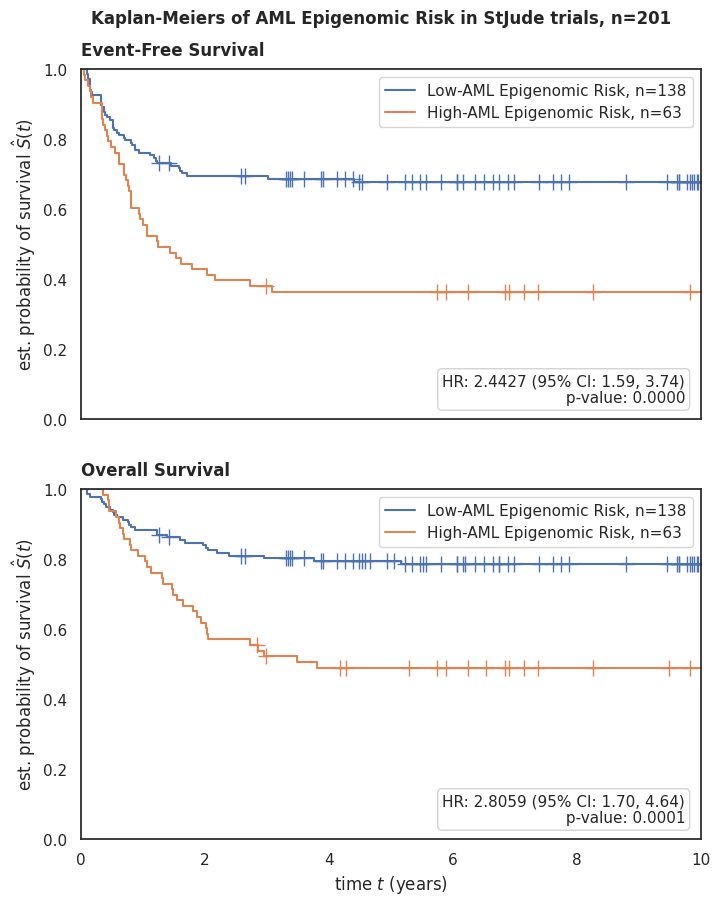

In [6]:
# Import Plotting Functions
# import sys
# sys.path.append('../')
# from source.data_visualization_functions import *
import seaborn as sns
import matplotlib.pyplot as plt

draw_kaplan_meier(model_name=model_name,
                        df=df_test,
                        save_survival_table=False,
                        save_plot=False,
                        show_ci=False,
                        add_risk_counts=False,
                        trialname='StJude trials')

#### Per risk group

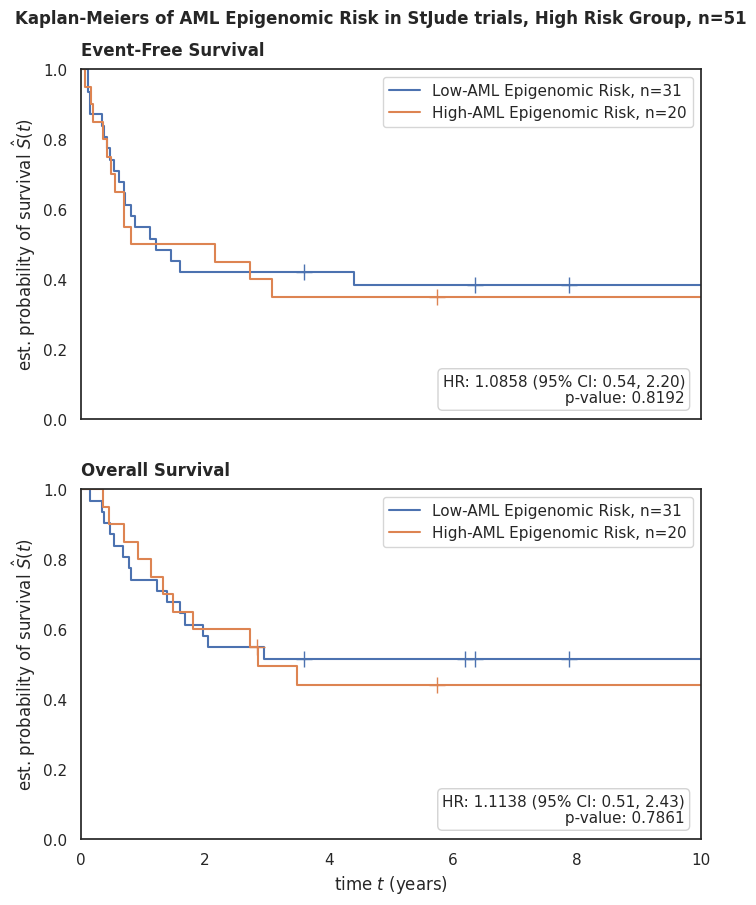

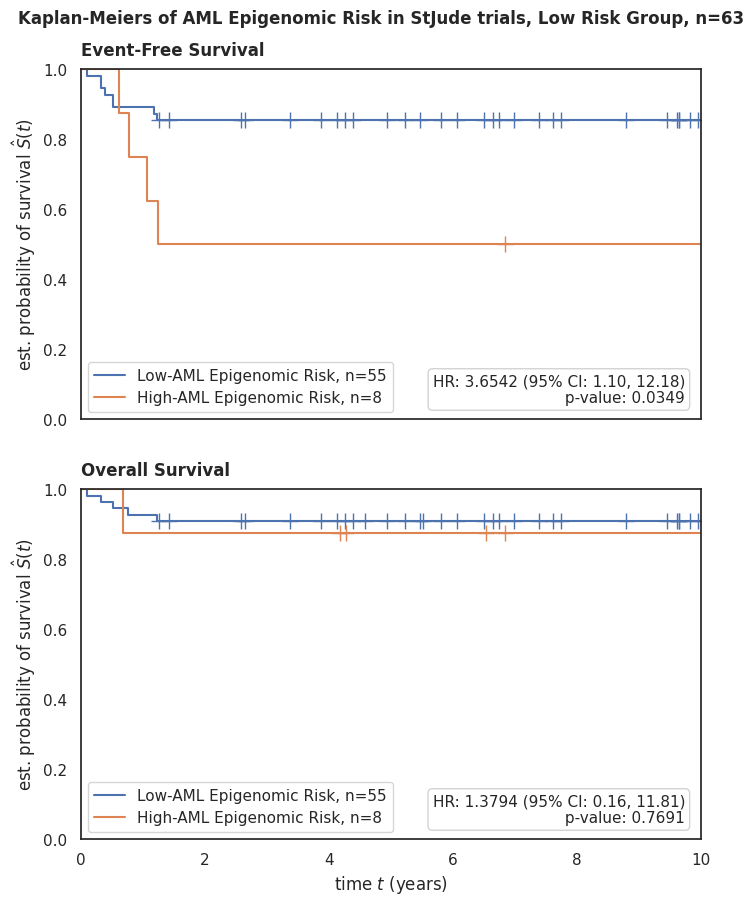

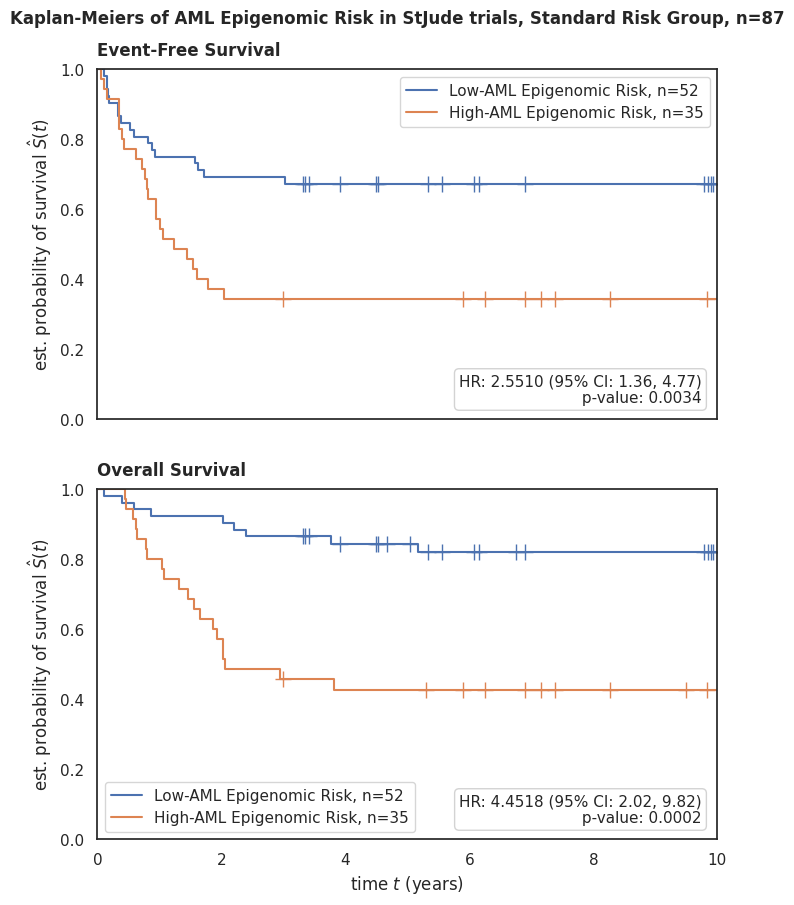

In [7]:
draw_kaplan_meier(model_name=model_name,
                        df=df_test[df_test['Risk Group'] == 'High Risk'],
                        save_plot=False,
                        save_survival_table=False,
                        add_risk_counts=False,
                        trialname='StJude trials, High Risk Group')

draw_kaplan_meier(model_name=model_name,
                        df=df_test[df_test['Risk Group'] == 'Low Risk'],
                        save_plot=False,
                        save_survival_table=False,
                        add_risk_counts=False,
                        trialname='StJude trials, Low Risk Group')

draw_kaplan_meier(model_name=model_name,
                        df=df_test[df_test['Risk Group'] == 'Standard Risk'],
                        save_plot=False,
                        save_survival_table=False,
                        add_risk_counts=False,
                        trialname='StJude trials, Standard Risk Group')

### Forest Plots

#### With MRD 1

In [9]:
df_test['AML_Epigenomic_Risk'] = df_test['AML Epigenomic Risk'] 

/tmp/ipykernel_37541/199057783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['AML_Epigenomic_Risk'] = df_test['AML Epigenomic Risk']


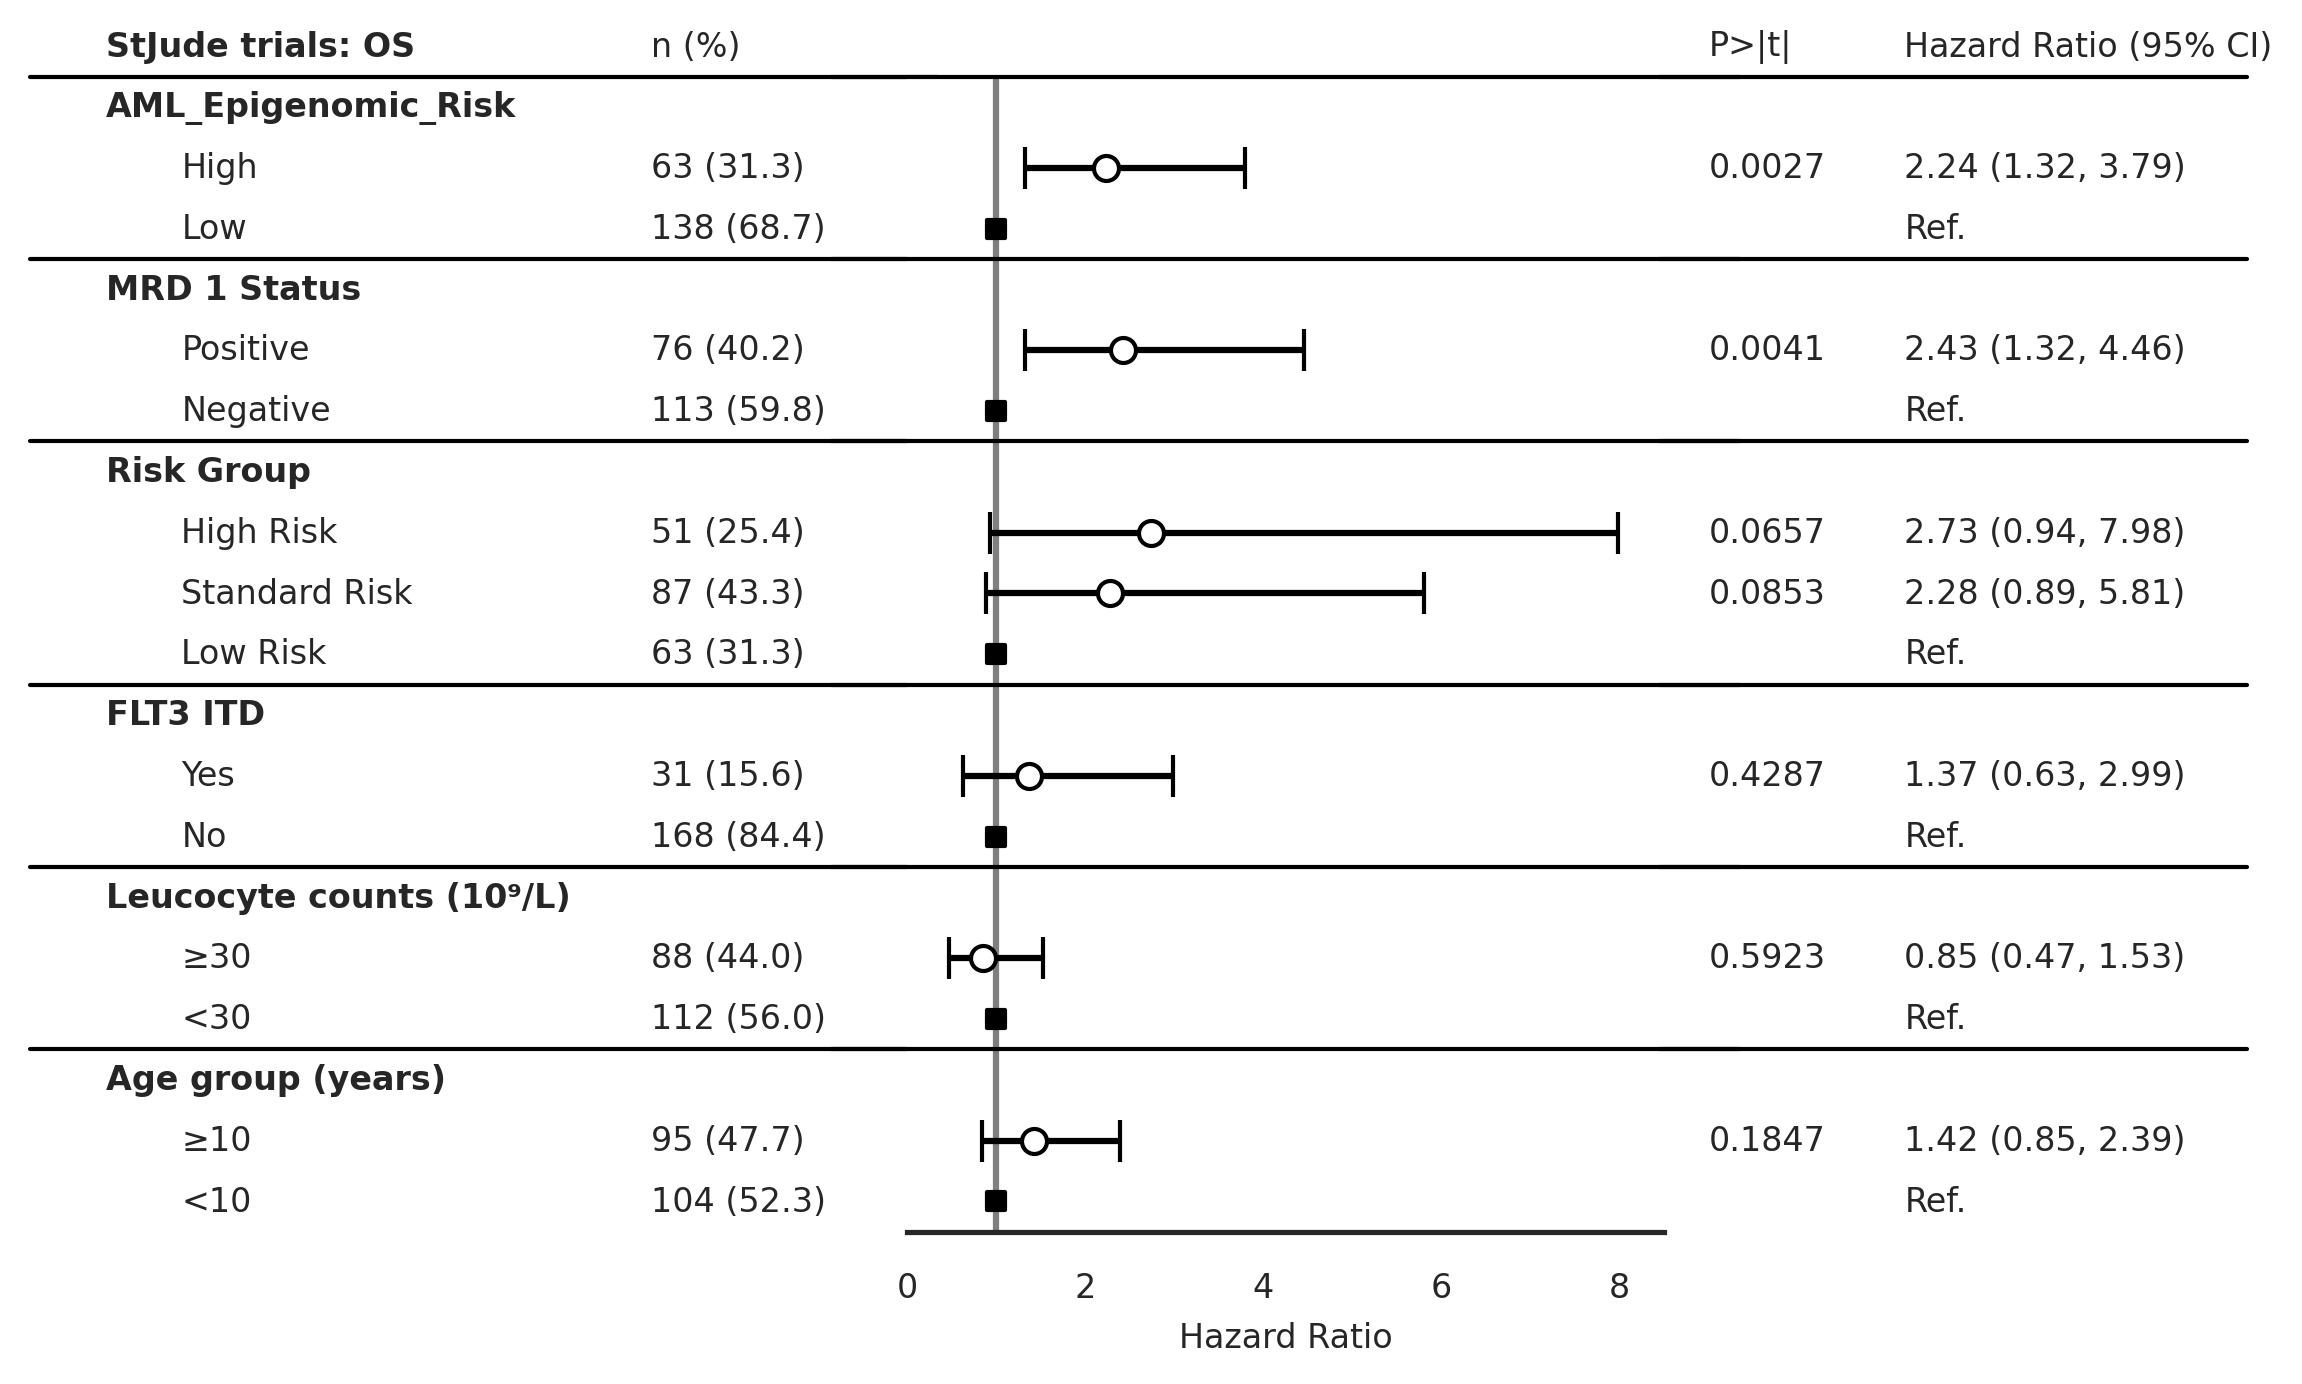

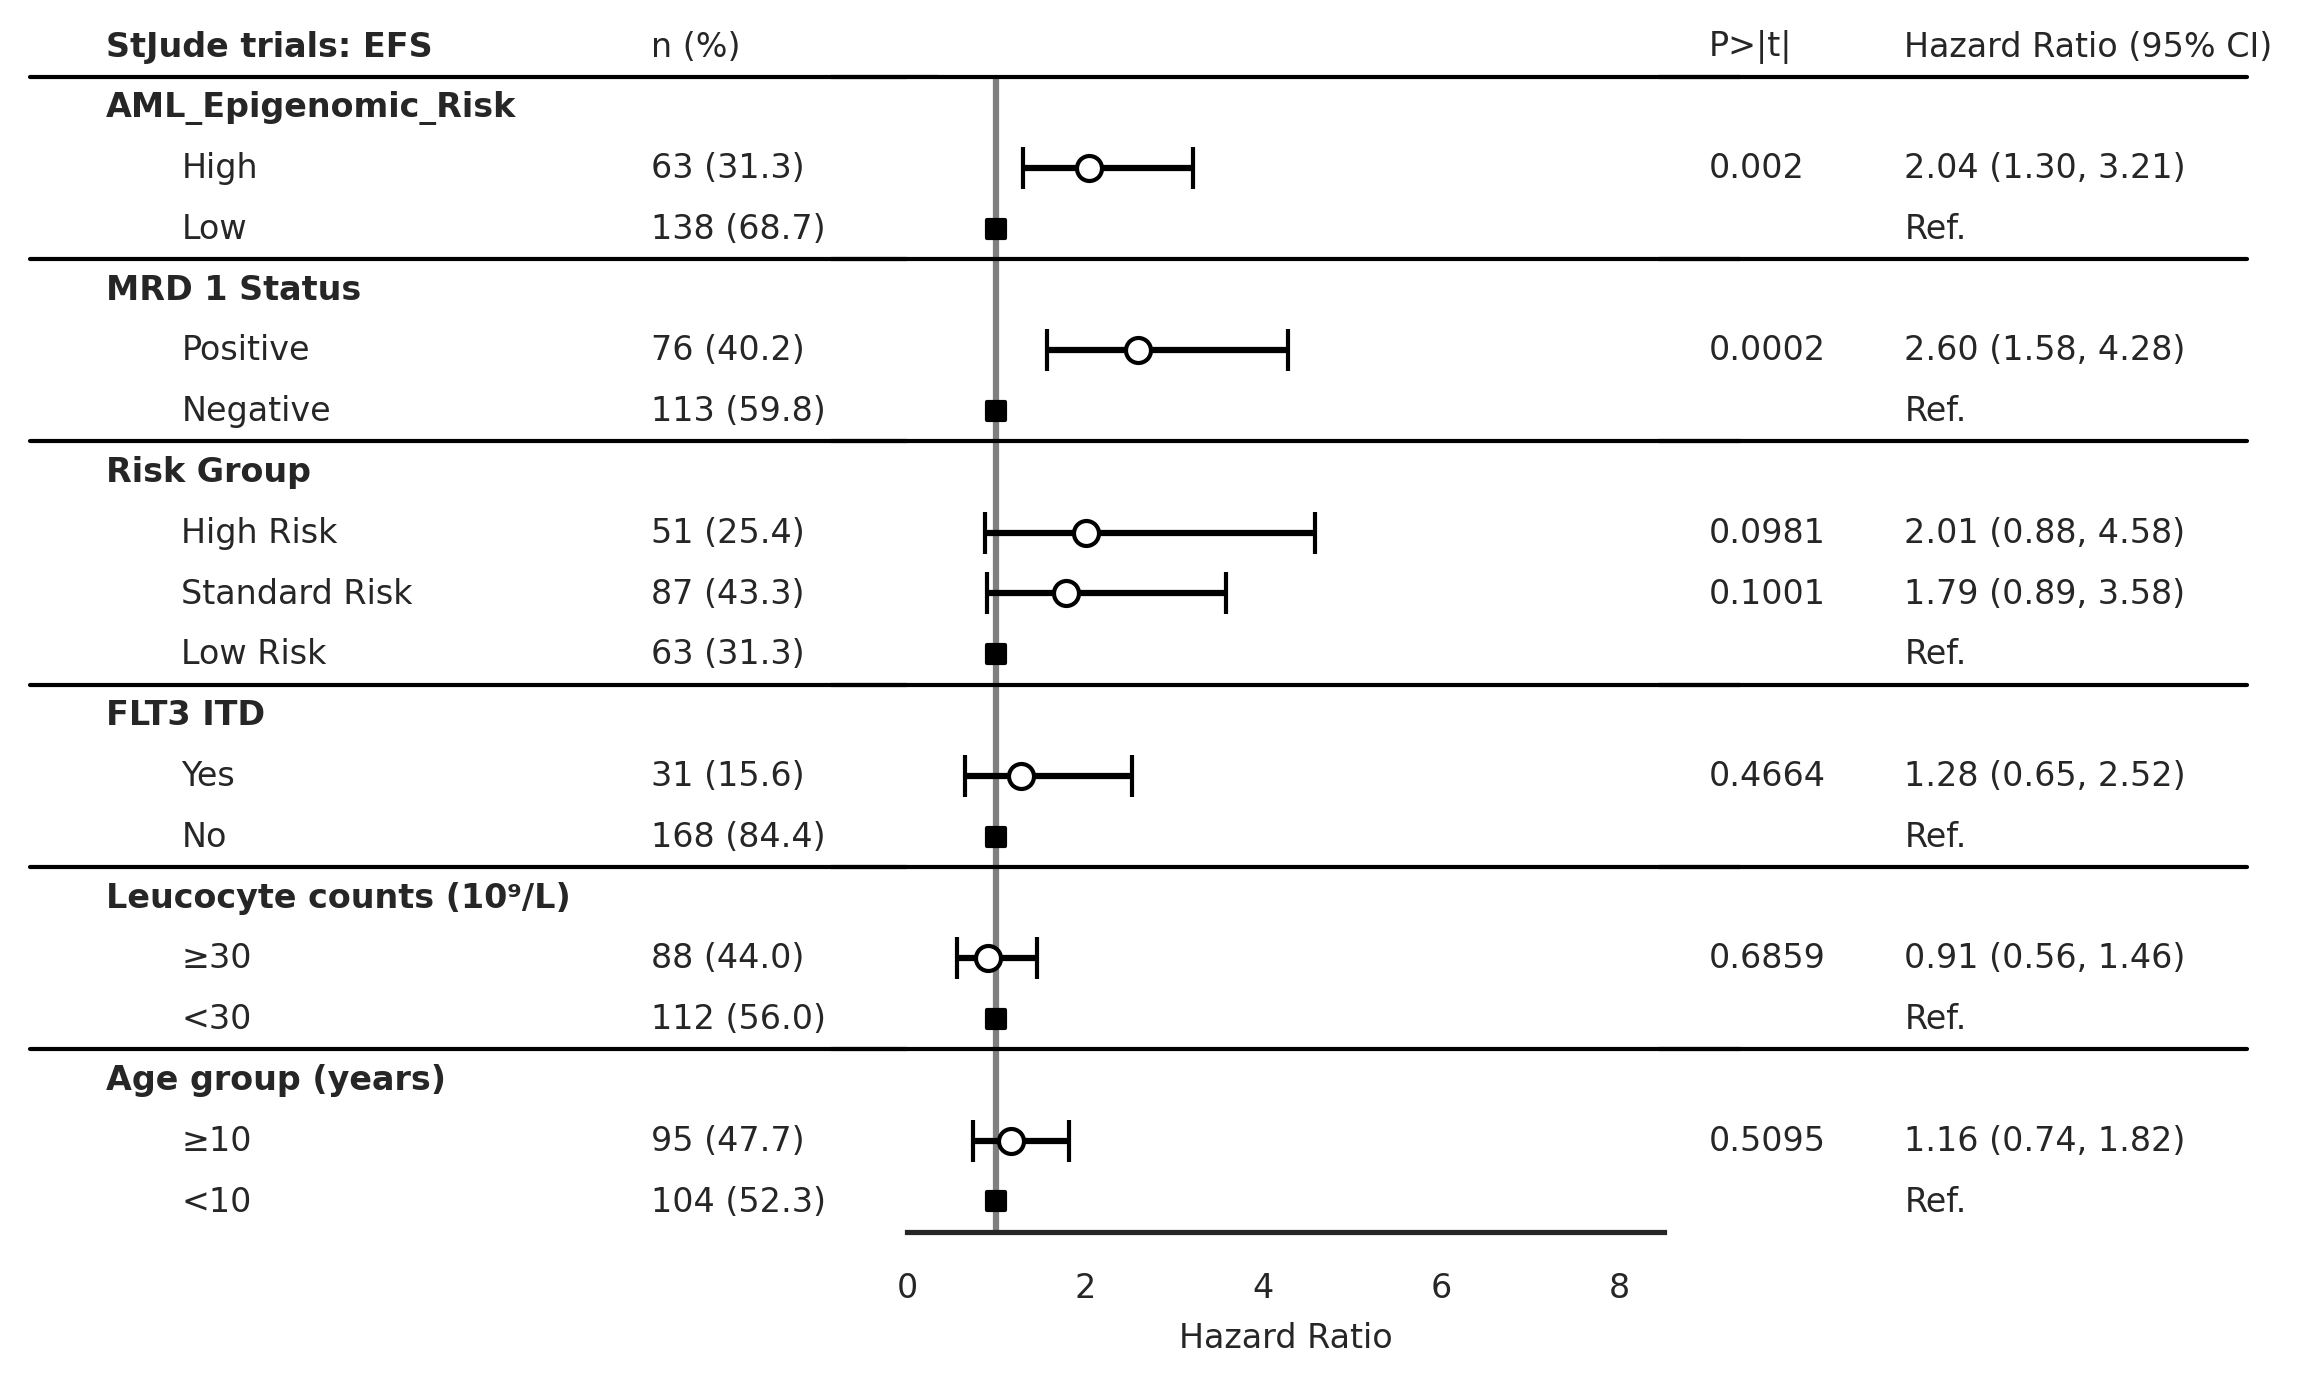

In [10]:
def draw_forest_plot(time, event, df, save_plot=False, trialname=None, scorename=None):
    """
    Generates a custom forest plot.

    Parameters:
    ----------
    time: object
        List of mean coeficients from CoxPH fit.
        Note: this value has to be a pandas series.
    event: object
        Dataframe to add your results to.
    df: object
        A dataframe of variables/features that will be used to calculate the score.
    save_plot: bool, default=False
        Set to True if you wish to save the plot.It will be saved under "../Figures/ForestPlot/"
    trialname: str
        Name of your clinical trial or dataset.
    scorename: str
        Name of your model.

    Returns:
    --------
        A magnificent forest plot.

    """
    import myforestplot as mfp
    from tableone import TableOne
    import statsmodels.formula.api as smf
    import numpy as np
    
    fp = df[[scorename,
             'MRD 1 Status',
             'Risk Group',
             'FLT3 ITD',
             'Leucocyte counts (10⁹/L)',
             'Age group (years)',
             time, event]]

    event2 = event.replace('.', '_')
    time2 = time.replace('.', '_')

    if event[0] == 'o':
        event3 = 'OS'
    else:
        event3 = 'EFS'

    fp2 = fp.rename(columns={event: event2,
                             time: time2,
                             'MRD 1 Status': 'MRD_1_Status',
                             'FLT3 ITD': 'FLT3_ITD',
                             'Risk Group': 'Risk_Group',
                             'Leucocyte counts (10⁹/L)': 'WBC_count',
                             'Age group (years)': 'Age_group'})

    res = smf.phreg(formula=time2 + " ~ C("+scorename+",Treatment(reference='Low')) + C(MRD_1_Status) + C(Risk_Group,Treatment(reference='Low Risk')) + C(FLT3_ITD) + C(WBC_count) + C(Age_group)",
                    data=fp2, status=event2).fit()

    res2 = res.summary(xname=[scorename+'-High',
                              'MRD 1 Status-Positive',
                              'Risk Group-High Risk',
                              'Risk Group-Standard Risk',
                              'FLT3 ITD-Yes',
                              'Leucocyte counts (10⁹/L)-≥30',
                              'Age group (years)-≥10']).tables[1]

    res3 = res2.set_index(res2.index.str.split(pat='-', expand=True))

    mytable = TableOne(data=fp.drop(columns=[event, time]),
                       pval=False, missing=True, overall=True,
                       label_suffix=False, order={scorename: ['High'],
                                                  'MRD 1 Status': ['Positive'],
                                                  'Risk Group': ['High Risk', 'Standard Risk'],
                                                  'FLT3 ITD': ['Yes'],
                                                  'Leucocyte counts (10⁹/L)': ['≥30'],
                                                  'Age group (years)': ['≥10']}).tableone

    mytable2 = mytable.join(res3)

    mytable2["risk_pretty"] = mfp.add_pretty_risk_column(mytable2,
                                                         risk="HR",
                                                         lower='[0.025',
                                                         upper='0.975]',
                                                         fml=".2f"
                                                         )
    mytable3 = mytable2.reset_index(names=['category', 'item']).rename(columns={'HR': 'risk',
                                                                                '[0.025': 0,
                                                                                '0.975]': 1}).iloc[1:, :]

    mytable3['P>|t|'] = round(mytable3['P>|t|'], 4).replace(
        {np.nan: '', 0: '<0.0001'})

    plt.rcParams["font.size"] = 8
    fp = mfp.ForestPlot(df=mytable3,
                        ratio=[3, 3, 2],
                        fig_ax_index=[2],
                        dpi=300,
                        figsize=(9, 5),
                        vertical_align=True)
    fp.errorbar(index=2, errorbar_kwds=None)
    fp.axd[2].set_xlim([1, 8.5])
    fp.axd[2].set_xticks([0, 2, 4, 6, 8])
    fp.axd[2].set_xticklabels(labels=[0, 2, 4, 6, 8], fontdict={'fontsize': 8})
    fp.axd[2].set_xlabel("Hazard Ratio", fontsize=8)
    fp.axd[2].axvline(x=1, ymin=0, ymax=1.0, color="black", alpha=0.5)

    fp.axd[1].set_xlim([0.50, 1])
    fp.embed_cate_strings(1, "category", 0.5, header=trialname + " " + event3,
                          text_kwds=dict(fontweight="bold"),
                          header_kwds=dict(fontweight="bold"),
                          )
    fp.embed_strings(1, "item", 0.55, header="", replace={"age": ""})
    fp.embed_strings(1, "Overall", 0.86, header="n (%)")
    fp.embed_strings(3, "P>|t|", 0, header="P>|t|")
    fp.embed_strings(3, "risk_pretty", 0.4, header="Hazard Ratio (95% CI)")
    fp.horizontal_variable_separators()
    fp.draw_outer_marker(log_scale=False, scale=0.008, index=2)

    # Save plot figure
    if save_plot == True:
        plt.savefig('../Figures/Forest_Plots/' + scorename + '_' + trialname + '_' + str(len(df)) + '_' + event3 + '.png',
                    bbox_inches='tight', dpi=300)

    return (plt.show())


draw_forest_plot(time='os.time',
                    event='os.evnt',
                    df=df_test,
                    trialname='StJude trials:',
                    scorename='AML_Epigenomic_Risk',
                    save_plot=False)

draw_forest_plot(time='efs.time',
                    event='efs.evnt',
                    df=df_test,
                    trialname='StJude trials:',
                    scorename='AML_Epigenomic_Risk',
                    save_plot=False)

#### Without MRD 1

In [30]:
# draw_forest_plot_noMRD(time='os.time',
#                     event='os.evnt',
#                     df=df_test,
#                     trialname='StJude trials:',
#                     scorename='AML_Epigenomic_Risk',
#                     save_plot=False)

# draw_forest_plot_noMRD(time='efs.time',
#                     event='efs.evnt',
#                     df=df_test,
#                     trialname='StJude trials:',
#                     scorename='AML_Epigenomic_Risk',
#                     save_plot=False)

### ROC AUC

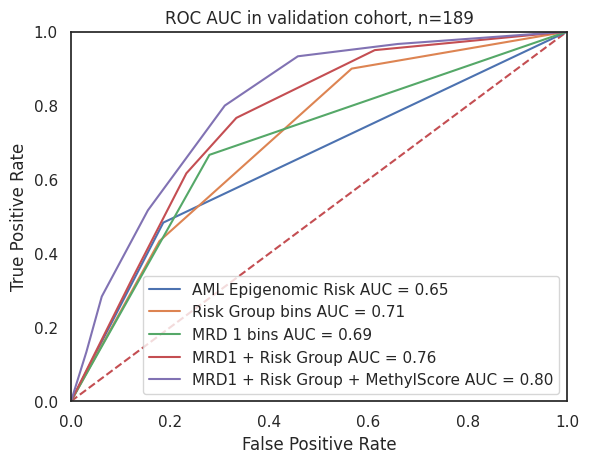

In [34]:
# Your current preprocessing
df_test['Risk Group bins'] = df_test['Risk Group'].replace({'Low Risk':0, 'Standard Risk':0.5, 'High Risk':1})
df_test['MRD 1 bins'] = df_test['MRD 1 Status'].replace({'Negative':0, 'Positive':1})
df_test2 = df_test[['os.evnt', model_name + '_int', 'Risk Group bins', 'MRD 1 bins']].dropna()

# rename column `MethylScoreAML_Px_cat_bin` to `MethylScoreAML Px`
df_test2 = df_test2.rename(columns={model_name + '_int':model_name})

# Add new columns based on standardized values
df_test2['MRD1 + Risk Group'] = df_test['MRD 1 bins'] + df_test['Risk Group bins']
df_test2['MRD1 + Risk Group + MethylScore'] = df_test['MRD 1 bins'] + df_test['Risk Group bins'] + df_test[model_name + '_int']


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

def plot_roc_auc(df, score_columns, outcome_column, trial_name='validation cohort'):
    """
    Plots the ROC AUC curves for multiple models given a dataframe and multiple score columns.
    
    Parameters:
    - df (pd.DataFrame): Dataframe containing the score and outcome columns.
    - score_columns (list of str): List of names of columns that contain the scores.
    - outcome_column (str): The name of the column that contains the true outcomes.
    
    Returns:
    None
    """
    
    plt.figure()
    plt.title('ROC AUC in ' + trial_name + ', n={}'.format(len(df)))
    
    # plot random guessing line
    plt.plot([0, 1], [0, 1], 'r--')

    # binarize the outcome variable
    lb = LabelBinarizer()
    lb.fit(df[outcome_column])
    y = lb.transform(df[outcome_column])
    
    # Loop over score_columns to plot multiple ROC curves
    for score_column in score_columns:
        
        # calculate the fpr and tpr for all thresholds of the classification
        fpr, tpr, threshold = roc_curve(y, df[score_column])
        roc_auc = auc(fpr, tpr)
        
        # plot ROC curve for this score_column
        plt.plot(fpr, tpr, label=f'{score_column} AUC = %0.2f' % roc_auc)

    # set x and y limits
    plt.xlim([0, 1])
    plt.ylim([0, 1])

    # set x and y labels
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    # add legend
    plt.legend(loc='lower right')
    plt.show()

# Example Usage:
score_columns = [model_name, 'Risk Group bins', 'MRD 1 bins', 'MRD1 + Risk Group', 'MRD1 + Risk Group + MethylScore']
outcome_column = 'os.evnt'
plot_roc_auc(df_test2, score_columns, outcome_column)



### Box Plots

AttributeError: module 'seaborn.categorical' has no attribute '_BoxPlotter'

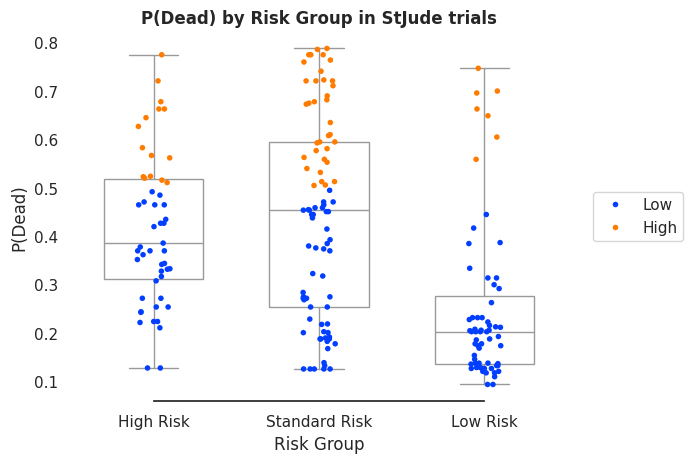

In [40]:
draw_boxplot(df=df_test,x='Risk Group', y='P(Dead)',
                order=['High Risk', 'Standard Risk', 'Low Risk'],
                trialname='StJude trials', hue=model_name,
                save_plot=False, figsize=None)

draw_boxplot(df=df_test,x='MRD 1 Status', y='P(Dead)',
                order=['Positive','Negative'],
                trialname='StJude trials', hue=model_name,
                save_plot=False, figsize=None)

draw_boxplot(df=df_test,x='Primary Cytogenetic Code', y='P(Dead)',
                order='auto',
                trialname='StJude trials', hue=model_name,
                save_plot=False, figsize=None)

### Stacked Bar Plots

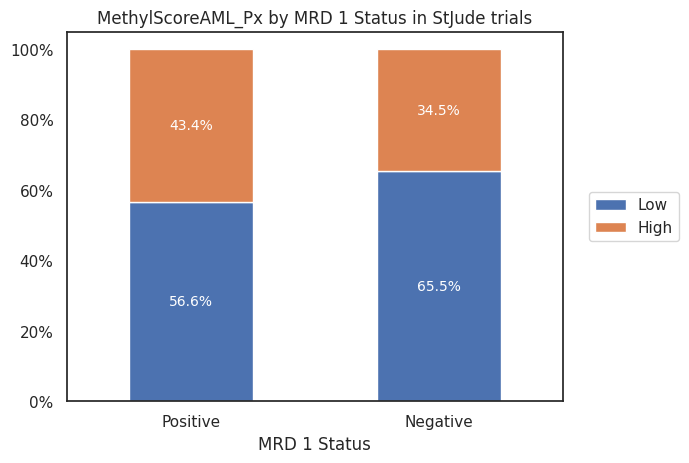

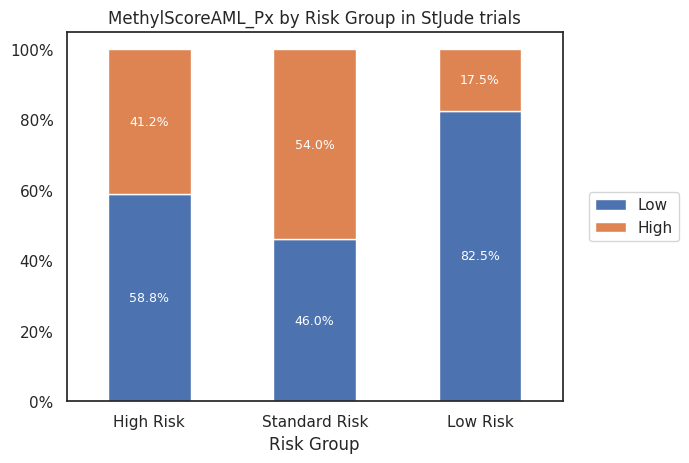

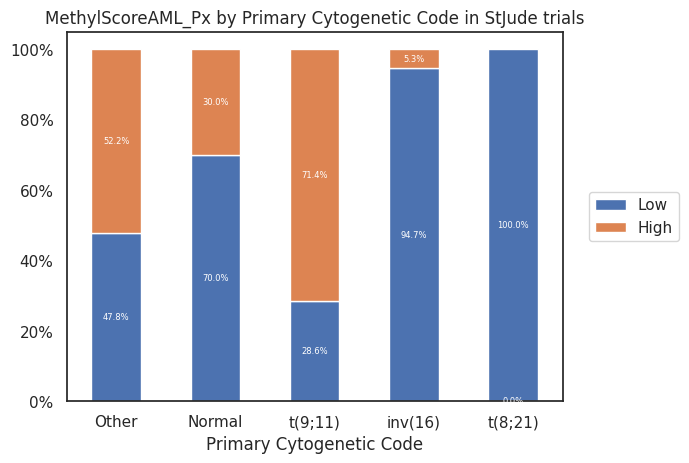

In [13]:
draw_stacked_barplot(df=validation_clinical_data,x='MRD 1 Status', y=score_name,
             order=['Positive','Negative'],
             trialname='StJude trials', hue=score_name + ' Categorical',
             save_plot=False, figsize=None)

draw_stacked_barplot(df=validation_clinical_data,x='Risk Group', y=score_name,
                order=['High Risk', 'Standard Risk', 'Low Risk'],
                trialname='StJude trials', hue=score_name + ' Categorical',
                save_plot=False, figsize=None, fontsize=9)

draw_stacked_barplot(df=validation_clinical_data,x='Primary Cytogenetic Code', y=score_name,
                order='auto',
                trialname='StJude trials', hue=score_name + ' Categorical',
                save_plot=False, figsize=None, fontsize=6)



### Patient Characteristics Table

#### Overall study population

In [14]:
from tableone import TableOne

columns = ['Age (years)','Age group (years)','Sex','Race or ethnic group',
            'Hispanic or Latino ethnic group', 'MRD 1 Status',
            'Leucocyte counts (10⁹/L)', 'BM Leukemic blasts (%)',
            'Risk Group', 'Clinical Trial','FLT3 ITD','Treatment Arm']

validation_clinical_data['Age (years)'] = validation_clinical_data['Age (years)'].astype(float)

mytable_cog = TableOne(validation_clinical_data, columns,
                        overall=False, missing=True,
                        pval=False, pval_adjust=False,
                        htest_name=True,dip_test=True,
                        tukey_test=True, normal_test=True,

                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']})

mytable_cog.to_csv(output_path + 'multivariate_cox_lasso/tableone_validation_cohort.csv')

mytable_cog.tabulate(tablefmt="html", 
                        headers=[score_name,"",'Missing','Validation Cohort'])

'<table>\n<thead>\n<tr><th>MethylScoreAML_Px                     </th><th>                                         </th><th>Missing  </th><th>Validation Cohort  </th></tr>\n</thead>\n<tbody>\n<tr><td>n                                     </td><td>                                         </td><td>         </td><td>201                </td></tr>\n<tr><td>Age (years), mean (SD)                </td><td>                                         </td><td>2        </td><td>8.8 (6.0)          </td></tr>\n<tr><td>Age group (years), n (%)              </td><td>≥10                                      </td><td>2        </td><td>95 (47.7)          </td></tr>\n<tr><td>                                      </td><td>&lt;10                                      </td><td>         </td><td>104 (52.3)         </td></tr>\n<tr><td>Sex, n (%)                            </td><td>Female                                   </td><td>0        </td><td>87 (43.3)          </td></tr>\n<tr><td>                                      </td><td>Male                                     </td><td>         </td><td>114 (56.7)         </td></tr>\n<tr><td>Race or ethnic group, n (%)           </td><td>White                                    </td><td>2        </td><td>143 (71.9)         </td></tr>\n<tr><td>                                      </td><td>Black or African American                </td><td>         </td><td>32 (16.1)          </td></tr>\n<tr><td>                                      </td><td>Asian                                    </td><td>         </td><td>1 (0.5)            </td></tr>\n<tr><td>                                      </td><td>Native Hawaiian or other Pacific Islander</td><td>         </td><td>2 (1.0)            </td></tr>\n<tr><td>                                      </td><td>Other                                    </td><td>         </td><td>21 (10.6)          </td></tr>\n<tr><td>Hispanic or Latino ethnic group, n (%)</td><td>Hispanic or Latino                       </td><td>2        </td><td>25 (12.6)          </td></tr>\n<tr><td>                                      </td><td>Not Hispanic or Latino                   </td><td>         </td><td>174 (87.4)         </td></tr>\n<tr><td>MRD 1 Status, n (%)                   </td><td>Positive                                 </td><td>12       </td><td>76 (40.2)          </td></tr>\n<tr><td>                                      </td><td>Negative                                 </td><td>         </td><td>113 (59.8)         </td></tr>\n<tr><td>Leucocyte counts (10⁹/L), n (%)       </td><td>≥30                                      </td><td>1        </td><td>88 (44.0)          </td></tr>\n<tr><td>                                      </td><td>&lt;30                                      </td><td>         </td><td>112 (56.0)         </td></tr>\n<tr><td>BM Leukemic blasts (%), mean (SD)     </td><td>                                         </td><td>21       </td><td>60.0 (25.6)        </td></tr>\n<tr><td>Risk Group, n (%)                     </td><td>High Risk                                </td><td>0        </td><td>51 (25.4)          </td></tr>\n<tr><td>                                      </td><td>Standard Risk                            </td><td>         </td><td>87 (43.3)          </td></tr>\n<tr><td>                                      </td><td>Low Risk                                 </td><td>         </td><td>63 (31.3)          </td></tr>\n<tr><td>Clinical Trial, n (%)                 </td><td>AML02                                    </td><td>0        </td><td>159 (79.1)         </td></tr>\n<tr><td>                                      </td><td>AML08                                    </td><td>         </td><td>42 (20.9)          </td></tr>\n<tr><td>FLT3 ITD, n (%)                       </td><td>Yes                                      </td><td>2        </td><td>31 (15.6)          </td></tr>\n<tr><td>                                      </td><td>No                                       </td><td> 

#### Including both discovery and validation cohorts

In [15]:
# Load clinical data
discovery_clinical_data = pd.read_csv(input_path+'discovery_clinical_data.csv',
                                      low_memory=False, index_col=0)

discovery_clinical_data['Age (years)'] = discovery_clinical_data['Age (years)'].astype(float)

px = discovery_clinical_data.loc[ewas_top_cpgs.index]

dx = discovery_clinical_data
# [~discovery_clinical_data['ELN 2022 Diagnosis'].isin(['Mixed phenotype acute leukemia T/myeloid',
#                                        'Myeloid leukaemia associated with Down syndrome',
#                                        'AML with t(9;22)(q34.1;q11.2)/BCR::ABL1'])]
dx = dx[~dx['WHO 2022 Diagnosis'].isna()]

# Use only samples from df_index
dx = dx[dx.index.isin(pd.read_csv(output_path+'pacmap_output/pacmap_5d_output_acute_leukemia.csv', index_col=1).index)]

# join discovery clinical data with validation clinical data
all_cohorts = pd.concat([dx, px, validation_clinical_data],
                         axis=0, keys=['MethylScoreAML Dx Discovery','MethylScoreAML Px Discovery' ,'Validation'],
                         names=['cohort']).reset_index()


columns = ['Age group (years)','Sex', 'MRD 1 Status',
            'Leucocyte counts (10⁹/L)',
            'Risk Group','FLT3 ITD', 'Treatment Arm','Clinical Trial']

mytable_cog = TableOne(all_cohorts, columns,
                        overall=False, missing=False,
                        pval=False, pval_adjust=False,
                        htest_name=True,dip_test=True,
                        tukey_test=True, normal_test=True,

                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']},
                                groupby='cohort')

mytable_cog.to_excel('../data/tableone_both_cohorts.xlsx')

mytable_cog.tabulate(tablefmt="html", 
                        # headers=[score_name,"",score_name,'Validation','p-value','Statistical Test']
)

'<table>\n<thead>\n<tr><th>                               </th><th>                        </th><th>MethylScoreAML Dx Discovery  </th><th>MethylScoreAML Px Discovery  </th><th>Validation  </th></tr>\n</thead>\n<tbody>\n<tr><td>n                              </td><td>                        </td><td>2236                         </td><td>940                          </td><td>201         </td></tr>\n<tr><td>Age group (years), n (%)       </td><td>≥10                     </td><td>511 (47.1)                   </td><td>458 (48.7)                   </td><td>95 (47.7)   </td></tr>\n<tr><td>                               </td><td>&lt;10                     </td><td>573 (52.9)                   </td><td>482 (51.3)                   </td><td>104 (52.3)  </td></tr>\n<tr><td>Sex, n (%)                     </td><td>Female                  </td><td>696 (50.5)                   </td><td>466 (49.6)                   </td><td>87 (43.3)   </td></tr>\n<tr><td>                               </td><td>Male                    </td><td>683 (49.5)                   </td><td>474 (50.4)                   </td><td>114 (56.7)  </td></tr>\n<tr><td>MRD 1 Status, n (%)            </td><td>Positive                </td><td>276 (29.3)                   </td><td>258 (31.4)                   </td><td>76 (40.2)   </td></tr>\n<tr><td>                               </td><td>Negative                </td><td>666 (70.7)                   </td><td>563 (68.6)                   </td><td>113 (59.8)  </td></tr>\n<tr><td>Leucocyte counts (10⁹/L), n (%)</td><td>≥30                     </td><td>568 (52.4)                   </td><td>463 (49.3)                   </td><td>88 (44.0)   </td></tr>\n<tr><td>                               </td><td>&lt;30                     </td><td>516 (47.6)                   </td><td>477 (50.7)                   </td><td>112 (56.0)  </td></tr>\n<tr><td>Risk Group, n (%)              </td><td>High Risk               </td><td>139 (11.7)                   </td><td>128 (13.8)                   </td><td>51 (25.4)   </td></tr>\n<tr><td>                               </td><td>Standard Risk           </td><td>565 (47.7)                   </td><td>453 (48.9)                   </td><td>87 (43.3)   </td></tr>\n<tr><td>                               </td><td>Low Risk                </td><td>480 (40.5)                   </td><td>345 (37.3)                   </td><td>63 (31.3)   </td></tr>\n<tr><td>FLT3 ITD, n (%)                </td><td>Yes                     </td><td>170 (15.7)                   </td><td>164 (17.5)                   </td><td>31 (15.6)   </td></tr>\n<tr><td>                               </td><td>No                      </td><td>912 (84.3)                   </td><td>774 (82.5)                   </td><td>168 (84.4)  </td></tr>\n<tr><td>Treatment Arm, n (%)           </td><td>Arm A                   </td><td>247 (43.9)                   </td><td>258 (47.6)                   </td><td>107 (53.8)  </td></tr>\n<tr><td>                               </td><td>Arm B                   </td><td>316 (56.1)                   </td><td>284 (52.4)                   </td><td>92 (46.2)   </td></tr>\n<tr><td>Clinical Trial, n (%)          </td><td>AAML03P1                </td><td>60 (2.7)                     </td><td>36 (3.8)                     </td><td>            </td></tr>\n<tr><td>                               </td><td>AAML0531                </td><td>504 (22.5)                   </td><td>507 (53.9)                   </td><td>            </td></tr>\n<tr><td>                               </td><td>AAML1031                </td><td>489 (21.9)                   </td><td>397 (42.2)                   </td><td>            </td></tr>\n<tr><td>                               </td><td>Beat AML Consortium     </td><td>192 (8.6)                    </td><td>                             </td><td>            </td></tr>\n<tr><td>                               </td><td>CCG2961                 </td><td>31 (1.4)                     </td><td>                             </td><t

#### By MethylScore category

In [16]:
from tableone import TableOne

columns = ['Age (years)','Age group (years)','Sex','Race or ethnic group',
            'Hispanic or Latino ethnic group', 'MRD 1 Status',
            'Leucocyte counts (10⁹/L)', 'BM Leukemic blasts (%)',
            'Risk Group', 'Clinical Trial','FLT3 ITD']

validation_clinical_data['Age (years)'] = validation_clinical_data['Age (years)'].astype(float)

mytable_cog = TableOne(validation_clinical_data, columns,
                        overall=False, missing=True,
                        pval=True, pval_adjust=False,
                        htest_name=True,dip_test=True,
                        tukey_test=True, normal_test=True,

                        order={'FLT3 ITD':['Yes','No'],
                                'Race or ethnic group':['White','Black or African American','Asian'],
                                'MRD 1 Status': ['Positive'],
                                'Risk Group': ['High Risk', 'Standard Risk'],
                                'FLT3 ITD': ['Yes'],
                                'Leucocyte counts (10⁹/L)': ['≥30'],
                                'Age group (years)': ['≥10']},
                        groupby=score_name + ' Categorical')

mytable_cog.to_csv(output_path + 'multivariate_cox_lasso/tableone_validation_methylscoreaml_px.csv')
mytable_cog.to_excel('../data/tableone_validation_methylscoreaml_px.xlsx')

mytable_cog.tabulate(tablefmt="html", 
                        headers=[score_name,"",'Missing','High','Low','p-value','Statistical Test'])

'<table>\n<thead>\n<tr><th>MethylScoreAML_Px                     </th><th>                                         </th><th>Missing  </th><th>High       </th><th>Low        </th><th>p-value  </th><th>Statistical Test                         </th></tr>\n</thead>\n<tbody>\n<tr><td>n                                     </td><td>                                         </td><td>         </td><td>122        </td><td>79         </td><td>         </td><td>                                         </td></tr>\n<tr><td>Age (years), mean (SD)                </td><td>                                         </td><td>2        </td><td>9.6 (5.5)  </td><td>7.5 (6.4)  </td><td>0.021    </td><td>Two Sample T-test                        </td></tr>\n<tr><td>Age group (years), n (%)              </td><td>≥10                                      </td><td>2        </td><td>65 (53.7)  </td><td>30 (38.5)  </td><td>0.050    </td><td>Chi-squared                              </td></tr>\n<tr><td>                                      </td><td>&lt;10                                      </td><td>         </td><td>56 (46.3)  </td><td>48 (61.5)  </td><td>         </td><td>                                         </td></tr>\n<tr><td>Sex, n (%)                            </td><td>Female                                   </td><td>0        </td><td>48 (39.3)  </td><td>39 (49.4)  </td><td>0.209    </td><td>Chi-squared                              </td></tr>\n<tr><td>                                      </td><td>Male                                     </td><td>         </td><td>74 (60.7)  </td><td>40 (50.6)  </td><td>         </td><td>                                         </td></tr>\n<tr><td>Race or ethnic group, n (%)           </td><td>White                                    </td><td>2        </td><td>87 (71.9)  </td><td>56 (71.8)  </td><td>0.721    </td><td>Chi-squared (warning: expected count &lt; 5)</td></tr>\n<tr><td>                                      </td><td>Black or African American                </td><td>         </td><td>21 (17.4)  </td><td>11 (14.1)  </td><td>         </td><td>                                         </td></tr>\n<tr><td>                                      </td><td>Asian                                    </td><td>         </td><td>           </td><td>1 (1.3)    </td><td>         </td><td>                                         </td></tr>\n<tr><td>                                      </td><td>Native Hawaiian or other Pacific Islander</td><td>         </td><td>1 (0.8)    </td><td>1 (1.3)    </td><td>         </td><td>                                         </td></tr>\n<tr><td>                                      </td><td>Other                                    </td><td>         </td><td>12 (9.9)   </td><td>9 (11.5)   </td><td>         </td><td>                                         </td></tr>\n<tr><td>Hispanic or Latino ethnic group, n (%)</td><td>Hispanic or Latino                       </td><td>2        </td><td>11 (9.1)   </td><td>14 (17.9)  </td><td>0.105    </td><td>Chi-squared                              </td></tr>\n<tr><td>                                      </td><td>Not Hispanic or Latino                   </td><td>         </td><td>110 (90.9) </td><td>64 (82.1)  </td><td>         </td><td>                                         </td></tr>\n<tr><td>MRD 1 Status, n (%)                   </td><td>Positive                                 </td><td>12       </td><td>43 (36.8)  </td><td>33 (45.8)  </td><td>0.278    </td><td>Chi-squared                              </td></tr>\n<tr><td>                                      </td><td>Negative                                 </td><td>         </td><td>74 (63.2)  </td><td>39 (54.2)  </td><td>         </td><td>                                         </td></tr>\n<tr><td>Leucocyte counts (10⁹/L), n (%)       </td><td>≥30                                      </td><td>1        </td><td>53 (43.4)  </td><td>35 (44.9)  </td><td>0.958    </td><td>Chi-squared                    

## Watermark

In [17]:
%load_ext watermark

In [18]:
# watermark with all libraries used in this notebook
%watermark -v -p pandas,seaborn,matplotlib,tableone,sklearn,lifelines,statannotations -a Francisco_Marchi@Lamba_Lab_UF -d -m

Author: Francisco_Marchi@Lamba_Lab_UF

Python implementation: CPython
Python version       : 3.8.16
IPython version      : 8.12.2

pandas         : 2.0.2
seaborn        : 0.12.2
matplotlib     : 3.7.1
tableone       : 0.7.12
sklearn        : 1.2.2
lifelines      : 0.27.7
statannotations: 0.5.0

Compiler    : GCC 11.3.0
OS          : Linux
Release     : 5.15.133.1-microsoft-standard-WSL2
Machine     : x86_64
Processor   : x86_64
CPU cores   : 20
Architecture: 64bit

